In [1]:
!pip install scikit-learn

In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [4]:
NUM_CLASSES = 9

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 9)                 99        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/34 [..............................] - ETA: 15s - loss: 2.1668 - accuracy: 0.1641
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 1s 8ms/step - loss: 2.0709 - accuracy: 0.2334 - val_loss: 1.9221 - val_accuracy: 0.2729
Epoch 2/1000
 1/34 [..............................] - ETA: 0s - loss: 1.9642 - accuracy: 0.2656
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 1.8967 - accuracy: 0.2834 - val_loss: 1.7704 - val_accuracy: 0.2813
Epoch 3/1000
 1/34 [..............................] - ETA: 0s - loss: 1.8083 - accuracy: 0.3125
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 1.7625 - accuracy: 0.3005 - val_loss: 1.6446 - val_accuracy: 0.3826
Epoch 4/1000
 1/34 [..............................] - ETA: 0s - loss: 1.6478 - accuracy: 0.3438


 1/34 [..............................] - ETA: 0s - loss: 1.0845 - accuracy: 0.6328
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 2ms/step - loss: 1.1311 - accuracy: 0.5897 - val_loss: 0.8109 - val_accuracy: 0.7686
Epoch 29/1000
 1/34 [..............................] - ETA: 0s - loss: 1.0575 - accuracy: 0.6328
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 2ms/step - loss: 1.1253 - accuracy: 0.5897 - val_loss: 0.7971 - val_accuracy: 0.7743
Epoch 30/1000
 1/34 [..............................] - ETA: 0s - loss: 1.2491 - accuracy: 0.5859
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 2ms/step - loss: 1.1086 - accuracy: 0.5977 - val_loss: 0.7894 - val_accuracy: 0.7792
Epoch 31/1000
 1/34 [..............................] - ETA: 0s - loss: 1.0694 - accuracy: 0.6328
Epoch 31

 1/34 [..............................] - ETA: 0s - loss: 0.9784 - accuracy: 0.6328
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 1s 21ms/step - loss: 0.9762 - accuracy: 0.6465 - val_loss: 0.6002 - val_accuracy: 0.8150
Epoch 56/1000
 1/34 [..............................] - ETA: 0s - loss: 1.0152 - accuracy: 0.6250
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 1s 23ms/step - loss: 0.9578 - accuracy: 0.6484 - val_loss: 0.5905 - val_accuracy: 0.8200
Epoch 57/1000
 1/34 [..............................] - ETA: 0s - loss: 1.0151 - accuracy: 0.5859
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 1s 38ms/step - loss: 0.9643 - accuracy: 0.6498 - val_loss: 0.5946 - val_accuracy: 0.8277
Epoch 58/1000
 1/34 [..............................] - ETA: 0s - loss: 0.9669 - accuracy: 0.6172
Epoch

 1/34 [..............................] - ETA: 0s - loss: 0.9657 - accuracy: 0.6641
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 5ms/step - loss: 0.8781 - accuracy: 0.6784 - val_loss: 0.5043 - val_accuracy: 0.8601
Epoch 83/1000
 1/34 [..............................] - ETA: 0s - loss: 0.9044 - accuracy: 0.6875
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 4ms/step - loss: 0.8733 - accuracy: 0.6871 - val_loss: 0.4998 - val_accuracy: 0.8727
Epoch 84/1000
 1/34 [..............................] - ETA: 0s - loss: 0.7728 - accuracy: 0.7266
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 5ms/step - loss: 0.8857 - accuracy: 0.6838 - val_loss: 0.5016 - val_accuracy: 0.8685
Epoch 85/1000
 1/34 [..............................] - ETA: 0s - loss: 1.0086 - accuracy: 0.7031
Epoch 85

 1/34 [..............................] - ETA: 0s - loss: 0.7750 - accuracy: 0.7266
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 2ms/step - loss: 0.8528 - accuracy: 0.6885 - val_loss: 0.4600 - val_accuracy: 0.8938
Epoch 110/1000
 1/34 [..............................] - ETA: 0s - loss: 0.8814 - accuracy: 0.6406
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 2ms/step - loss: 0.8739 - accuracy: 0.6786 - val_loss: 0.4695 - val_accuracy: 0.8790
Epoch 111/1000
 1/34 [..............................] - ETA: 0s - loss: 0.9248 - accuracy: 0.6719
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 2ms/step - loss: 0.8366 - accuracy: 0.6922 - val_loss: 0.4698 - val_accuracy: 0.8650
Epoch 112/1000
 1/34 [..............................] - ETA: 0s - loss: 1.0000 - accuracy: 0.6641
Ep

Epoch 136/1000
 1/34 [..............................] - ETA: 0s - loss: 0.8596 - accuracy: 0.7344
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 2ms/step - loss: 0.8269 - accuracy: 0.7042 - val_loss: 0.4480 - val_accuracy: 0.8938
Epoch 137/1000
 1/34 [..............................] - ETA: 0s - loss: 0.8193 - accuracy: 0.7031
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 2ms/step - loss: 0.8242 - accuracy: 0.6965 - val_loss: 0.4423 - val_accuracy: 0.9065
Epoch 138/1000
 1/34 [..............................] - ETA: 0s - loss: 0.7307 - accuracy: 0.7734
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 2ms/step - loss: 0.8200 - accuracy: 0.7044 - val_loss: 0.4321 - val_accuracy: 0.9142
Epoch 139/1000
 1/34 [..............................] - ETA: 0s - loss: 0.9034 - accu

Epoch 163/1000
 1/34 [..............................] - ETA: 0s - loss: 0.7950 - accuracy: 0.7500
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 2ms/step - loss: 0.8393 - accuracy: 0.7026 - val_loss: 0.4329 - val_accuracy: 0.9037
Epoch 164/1000
 1/34 [..............................] - ETA: 0s - loss: 0.8650 - accuracy: 0.6562
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.7942 - accuracy: 0.7082 - val_loss: 0.4260 - val_accuracy: 0.9156
Epoch 165/1000
 1/34 [..............................] - ETA: 0s - loss: 0.8420 - accuracy: 0.6875
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 2ms/step - loss: 0.8409 - accuracy: 0.6967 - val_loss: 0.4320 - val_accuracy: 0.9128
Epoch 166/1000
 1/34 [..............................] - ETA: 0s - loss: 0.8365 - accu

Epoch 190/1000
 1/34 [..............................] - ETA: 0s - loss: 0.7419 - accuracy: 0.7109
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.8059 - accuracy: 0.7112 - val_loss: 0.4190 - val_accuracy: 0.9142
Epoch 191/1000
 1/34 [..............................] - ETA: 0s - loss: 0.8259 - accuracy: 0.7344
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.7902 - accuracy: 0.7241 - val_loss: 0.4118 - val_accuracy: 0.9177
Epoch 192/1000
 1/34 [..............................] - ETA: 0s - loss: 0.8079 - accuracy: 0.7266
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.7863 - accuracy: 0.7183 - val_loss: 0.4045 - val_accuracy: 0.9191
Epoch 193/1000
 1/34 [..............................] - ETA: 0s - loss: 0.8525 - accu

In [13]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 [==============================] - 0s 909us/step - loss: 0.4120 - accuracy: 0.9170


In [14]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [15]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 68ms/step
[1.3591290e-02 1.3872917e-01 8.0639821e-01 1.7287735e-05 2.3197592e-03
 3.2250844e-02 2.2277590e-03 3.1042131e-05 4.4346633e-03]
2


# 混同行列

In [16]:
!pip install pandas seaborn matplotlib

45/45 [==============================] - 0s 591us/step


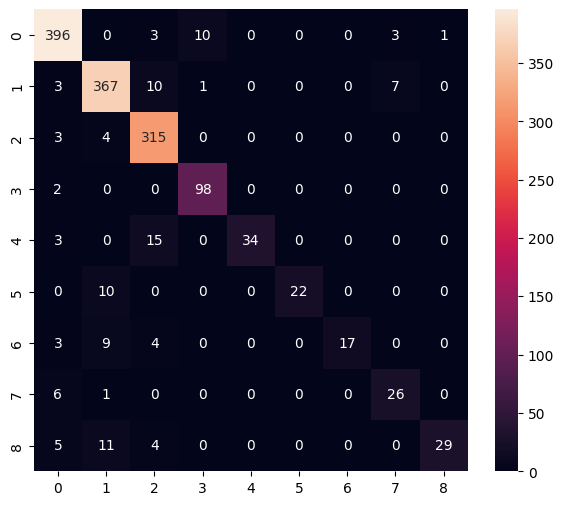

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       413
           1       0.91      0.95      0.93       388
           2       0.90      0.98      0.94       322
           3       0.90      0.98      0.94       100
           4       1.00      0.65      0.79        52
           5       1.00      0.69      0.81        32
           6       1.00      0.52      0.68        33
           7       0.72      0.79      0.75        33
           8       0.97      0.59      0.73        49

    accuracy                           0.92      1422
   macro avg       0.93      0.79      0.84      1422
weighted avg       0.92      0.92      0.91      1422



In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [18]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [19]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Kaku\AppData\Local\Temp\tmpe9vlphjp\assets


INFO:tensorflow:Assets written to: C:\Users\Kaku\AppData\Local\Temp\tmpe9vlphjp\assets


6764

# 推論テスト

In [20]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [21]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [22]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [23]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [24]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.3591284e-02 1.3872918e-01 8.0639827e-01 1.7287719e-05 2.3197574e-03
 3.2250855e-02 2.2277590e-03 3.1042106e-05 4.4346633e-03]
2
